<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Predicting_Heart_Disease_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/BTT Personal Project (Group 14)/heart_2020_cleaned.csv')
df   

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
# Check for nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **Visualizations & EDA**

All of the following visualizations were made with the original dataset before it was processed in any way. Because the number of people without heart disease naturally far outnumbers the number of people with heart disease, the visualizations may appear to have less in the “no” category.

## **Visualizations – Demographics**

The following visualization shows that a very small number of people in the original dataset, less than 10%, have heart disease.

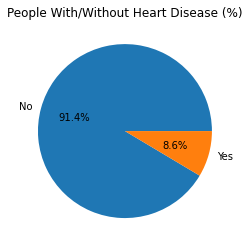

In [ ]:
# Percentage of People with/without Heart Disease
fig, ax = plt.subplots(1, 1,figsize =(8, 4))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.1f%%',labels=['No',"Yes"])
ax.set_title('People With/Without Heart Disease (%)')
fig.show()

As seen, the sexes represented in the dataset were roughly equal, with slightly more female respondents.

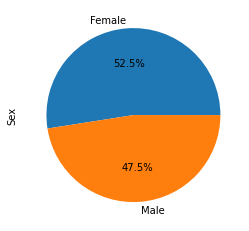

In [ ]:
# Sex of People in Dataset
df.Sex.value_counts().plot(kind='pie',autopct='%1.1f%%');

The males in the dataset appear to have a higher proportion of incidence of heart disease compared to the females in the dataset.

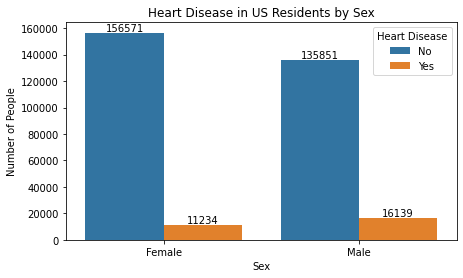

In [ ]:
# Sex: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')
ax.set(xlabel='Sex', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

65-69 is the age group most represented in the sample. In general, the elderly are more represented in the dataset compared to younger people

In [ ]:
# Age Categories of People in Dataset
df1 = df.groupby(["AgeCategory"]).count().reset_index()

fig1 = px.bar(df1,
             y=df.groupby(["AgeCategory"]).size(),
             x="AgeCategory",
             color='AgeCategory')
fig1.show()

The following visualization identifies those with and without heart disease based on race. The majority of respondents in the dataset are white, and American Indian/Native Alaskan are the least represented in the dataset.

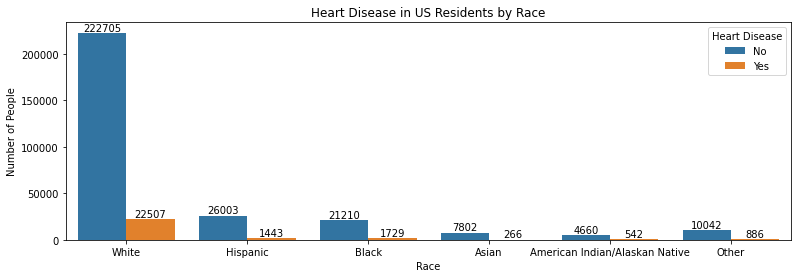

In [ ]:
# Race: People with Heart Disease
plt.figure(figsize=(13, 4))
ax = sns.countplot(data=df, x='Race', hue='HeartDisease', order=['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'])
ax.set(xlabel='Race', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Race')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## **Visualizations – Relationship with Lifestyle**

The boxplot below demonstrates the differences in BMI based on the presence of heart disease. We chose boxplot for BMI specifically because it helps demonstrate outliers for both “Yes” and “No” respondents.

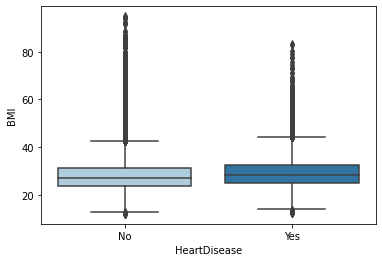

In [ ]:
# BMI by Heart Disease
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=df) #from the original dataset 
plt.show()

Because the values for BMI had such a wide range, we also decided to create categories to better represent BMI, from underweight all the way to obese. The majority of people in the dataset fell in the overweight category, yet the obese category had the highest number of “Yes” responses to having heart disease.

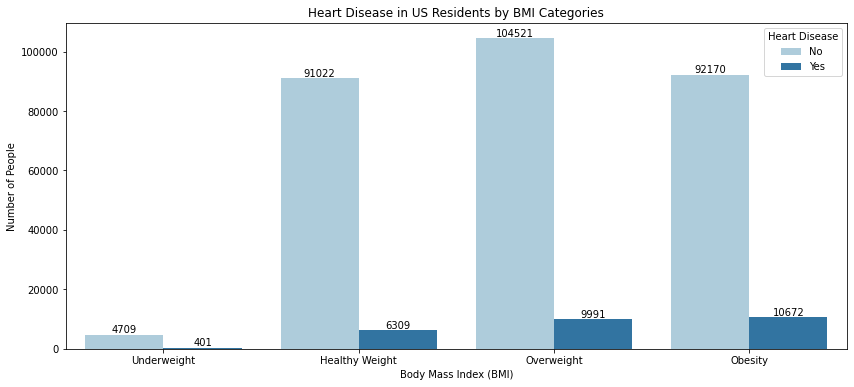

In [ ]:
# BMI (Categorized Barplot): People with Heart Disease

# Creating new column BMIGroup for BMI Categories
df.loc[df['BMI']<18.5, 'BMIGroup'] = 'Underweight'
df.loc[df['BMI'].between(18.5,25,inclusive='left'), 'BMIGroup'] = 'Healthy Weight'
df.loc[df['BMI'].between(25,30,inclusive='left'), 'BMIGroup'] = 'Overweight'
df.loc[df['BMI']>=30, 'BMIGroup'] = 'Obesity'

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='BMIGroup', hue='HeartDisease')
ax.set(xlabel='Body Mass Index (BMI)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by BMI Categories')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The pie chart represents those who have smoked 100 cigarettes (5 packs) in their lifetime, and the presence of heart disease amongst that group. Compared to the very small percentage of “Yes” from the original dataset, there is a far larger percentage of “Yes” when selecting smokers. Considering smoking is a direct risk factor for heart disease, the two are clearly very heavily associated.

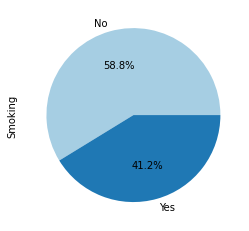

In [ ]:
# People who have Smoked at least 100 Cigaretes 
df.Smoking.value_counts().plot(kind='pie',autopct='%1.1f%%');

This visualization divides drinkers and non – drinkers and incidences of heart disease amongst those groups. There are far more non-drinkers in the dataset, and amongst both drinkers and non-drinkers, those who have heart disease are a very small percentage of their respective groups.

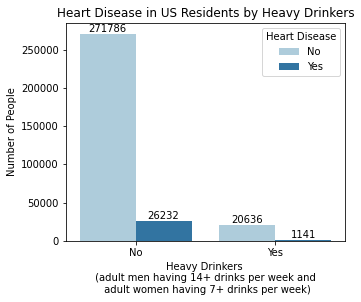

In [ ]:
# Heavy vs Nonheavy drinkers: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')
ax.set(xlabel='Heavy Drinkers \n (adult men having 14+ drinks per week and \n adult women having 7+ drinks per week)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Heavy Drinkers')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This visualization categorizes different choices for general health and relationship with heart disease. The majority of people had very good general health, with only a small number having poor health.

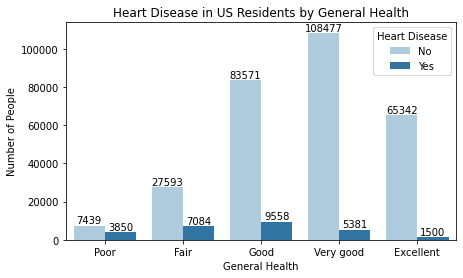

In [ ]:
# General Health: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
ax.set(xlabel='General Health', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by General Health')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This visualization displays the number of days one’s mental health was not good in the past 30 days. The vast majority had 0 days of poor mental health. For this specific column of data, there were many data points on both the high and low ends (0 and 30), which is reflected in the visualization.

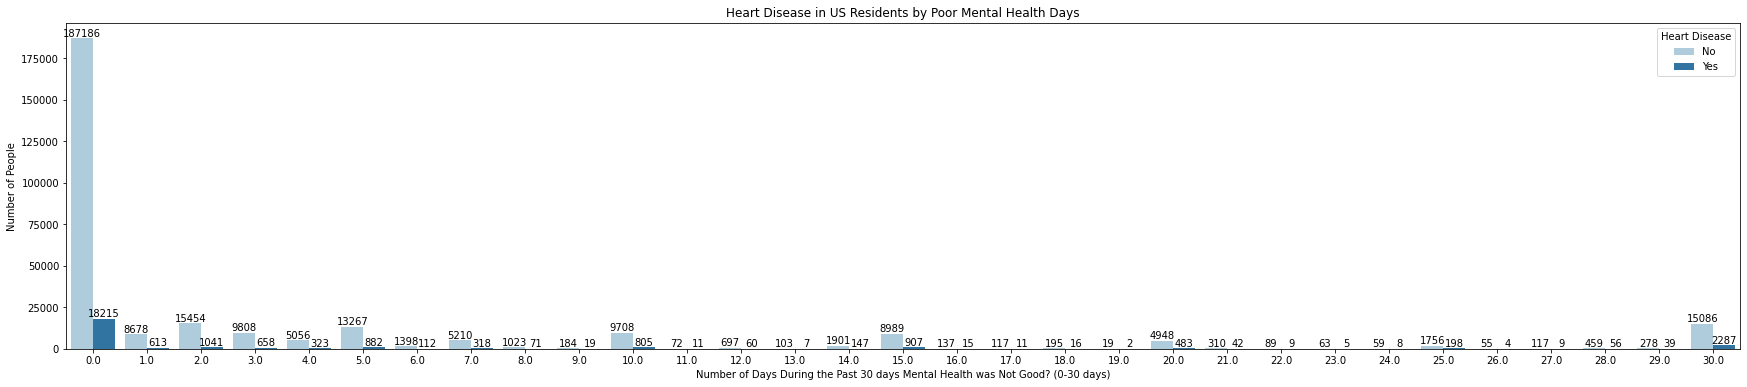

In [ ]:
# Mental Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='MentalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Mental Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Poor Mental Health Days')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This visualization displays the number of days one’s physical health was not good in the past 30 days. Most people had 0 days of bad physical health, and just like the mental health visualization, most data points were on the extreme ends, both high and low.

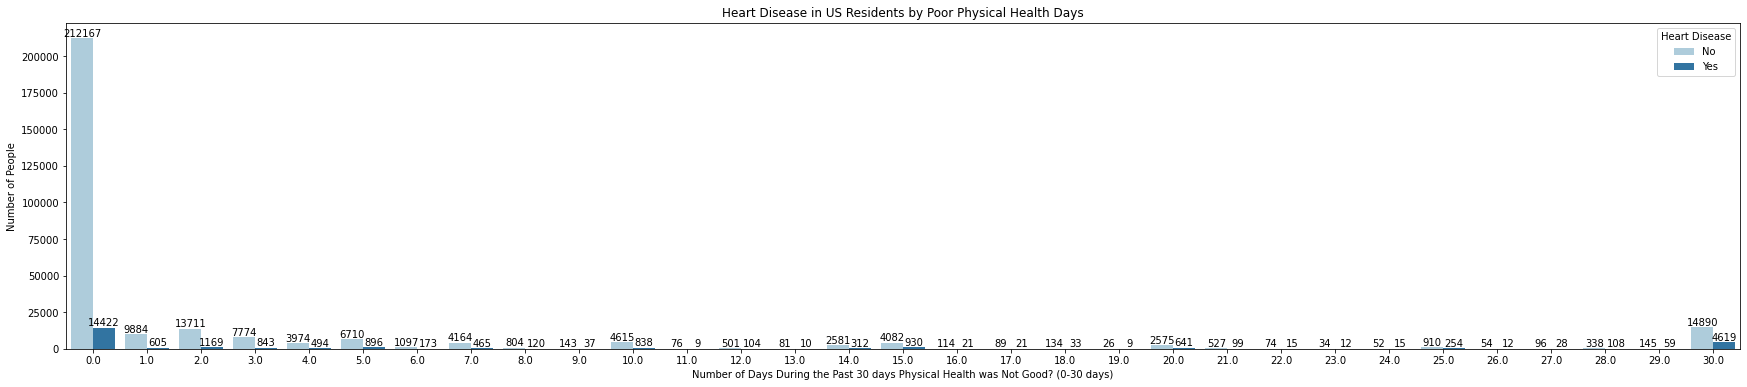

In [ ]:
# Physical Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='PhysicalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Physical Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Poor Physical Health Days')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The bar graph separates those who performed physical activity in the past 30 days versus those who did not. The majority of people did do physical activity, and the proportion of those with heart disease was higher amongst those who did not do physical activity compared to those who did perform physical activity.

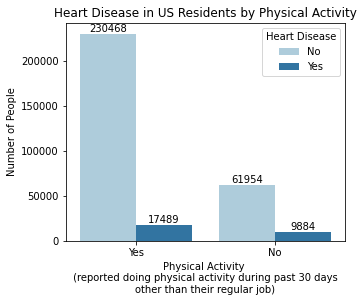

In [ ]:
# Physical Activity: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
ax.set(xlabel='Physical Activity \n (reported doing physical activity during past 30 days \nother than their regular job)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Physical Activity')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The bar graph shows the number of hours of sleep and relationship with heart disease. Most people slept either 7 or 8 hours per night. However, there were some clear outliers, such as those who slept for 24 hours or 0 hours per day. Those could be true to the person, however there is also the possibility that that is untrue or an error. One potential explanation for a large number of hours slept that we determined could be being in a comatose state, however those specific data points need to be investigated further.

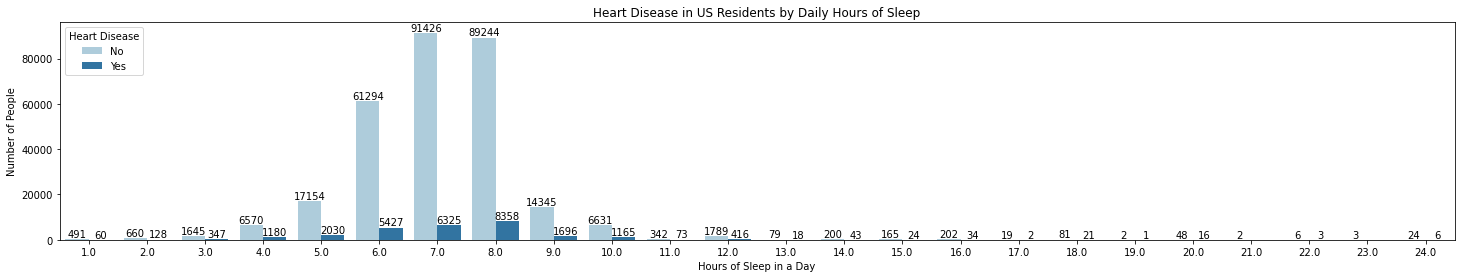

In [ ]:
# Sleep Time: People with Heart Disease
plt.figure(figsize=(25, 4))
ax = sns.countplot(data=df, x='SleepTime', hue='HeartDisease')
ax.set(xlabel='Hours of Sleep in a Day', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Daily Hours of Sleep')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## **Visualizations – Relationship with other health problems**

This bar graph shows the relationship between those who reported having difficulty walking and heart disease. Most people reported not having difficulty walking. However, the proportion of heart disease was higher amongst those who had difficulty walking compared to those who did not.

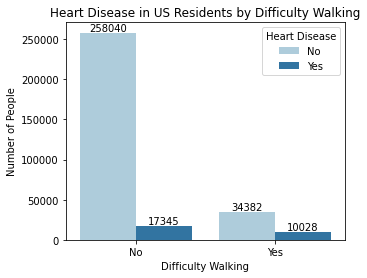

In [ ]:
# Difficulty Walking: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')
ax.set(xlabel='Difficulty Walking', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Difficulty Walking')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This visualization illustrates the relationship between stroke and heart disease. Most people did not have a stroke. Interestingly, over half of those with stroke reported having heart disease. This makes sense since having heart disease is a strong risk factor for having a stroke.

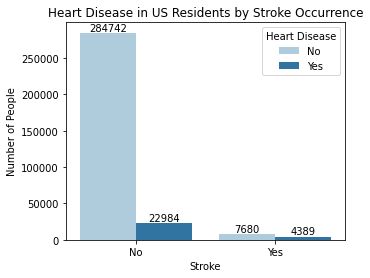

In [ ]:
# Stroke: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Stroke', hue='HeartDisease')
ax.set(xlabel='Stroke', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Stroke Occurrence')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The categories in the dataset for diabetes were split into the four shown below. Most people did not have diabetes. Amongst those who had diabetes, the proportion of those with heart disease is higher compared to the other categories.

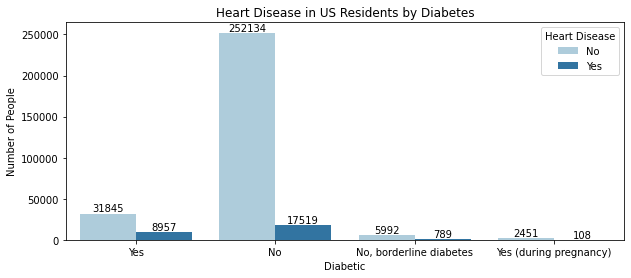

In [ ]:
# Diabetic: People with Heart Disease
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Diabetic', hue='HeartDisease')
ax.set(xlabel='Diabetic', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Diabetes')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The bar graph below shows the relationship between asthma and heart disease. The majority of respondents did not have heart disease, and the proportion of heart disease amongst the two groups were similar.

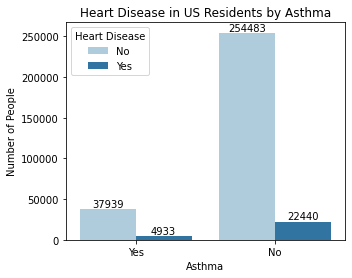

In [ ]:
# Asthma: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Asthma', hue='HeartDisease')
ax.set(xlabel='Asthma', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Asthma')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The bar graph shows the relationship between heart disease and kidney disease. Very few people responded yes to having kidney disease, yet the proportion of heart disease in that group was very high, with almost half of those with kidney disease having heart disease. A correlation exists between the two diseases, as failed kidney function can put more stress on the heart to function, which is a cause of heart disease.

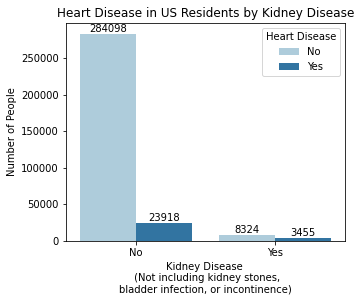

In [ ]:
# Kidney Disease: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')
ax.set(xlabel='Kidney Disease \n (Not including kidney stones,\nbladder infection, or incontinence)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Kidney Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The visualization illustrates the relationship between skin cancer and heart disease. Most people responded no to having skin cancer, and the proportions of heart disease amongst the two groups are similar.

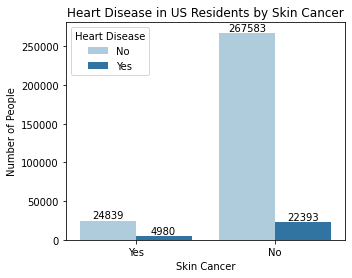

In [ ]:
# Skin Cancer: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
#ax = sns.displot(data=df, x='SkinCancer', hue='HeartDisease', multiple='stack')
ax.set(xlabel='Skin Cancer', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Skin Cancer')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# **Data Preprocessing**

## **Encoding**

Here, we convert categorical columns into numerical values to be easily fitted with our machine learning models. We first used label encoding to convert columns that have only 2 values into binary. Then, we numerically assigned the remaining categorical columns with more than 2 values in order.

In [ ]:
# Make a copy of the data for encoding
df_encoded = df.copy()

In [ ]:
# Encode categorical columns with 2 values (e.g. Yes/No)

le = preprocessing.LabelEncoder()
encoding_lst = []
binary_cols = [col for col in df_encoded.columns if df_encoded[col].dtype not in [int, float]
               and df_encoded[col].nunique() == 2]

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_lst.append([col, le_mapping])

# Printing the encoding mapping for reference
for row in encoding_lst:
    print(*row)
    
df_encoded.head()

HeartDisease {'No': 0, 'Yes': 1}
Smoking {'No': 0, 'Yes': 1}
AlcoholDrinking {'No': 0, 'Yes': 1}
Stroke {'No': 0, 'Yes': 1}
DiffWalking {'No': 0, 'Yes': 1}
Sex {'Female': 0, 'Male': 1}
PhysicalActivity {'No': 0, 'Yes': 1}
Asthma {'No': 0, 'Yes': 1}
KidneyDisease {'No': 0, 'Yes': 1}
SkinCancer {'No': 0, 'Yes': 1}


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,Underweight
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,Healthy Weight
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,Healthy Weight
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,Healthy Weight


In [ ]:
# Encoding categorical columns with more than 2 values

ageCategory = {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].replace(ageCategory)

race = {'American Indian/Alaskan Native':0, 'Asian':1, 'Black':2, 'Hispanic':3, 'White':4, 'Other':5}
df_encoded['Race'] = df_encoded['Race'].replace(race)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df_encoded['Diabetic'] = df_encoded['Diabetic'].replace(diabetic)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df_encoded['GenHealth'] = df_encoded['GenHealth'].replace(genHealth)

bmiGroup = {'Underweight':0, 'Healthy Weight':1, 'Overweight':2, 'Obesity':3}
df_encoded['BMIGroup'] = df_encoded['BMIGroup'].replace(bmiGroup)

df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,3,1,3,5.0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,3,7.0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,3,1,1,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,3,8.0,0,0,0,1


##**Correlation Matrix**

The correlation matrix below details the different levels of correlation between the different columns in the set, with numbers closer to one being a higher correlation and numbers closer to 0 being a lower correlation. Some notably higher levels of correlation between Physical Health and Difficulty Walking, Mental Health and Physical Health, and Skin Cancer and Age Category. 

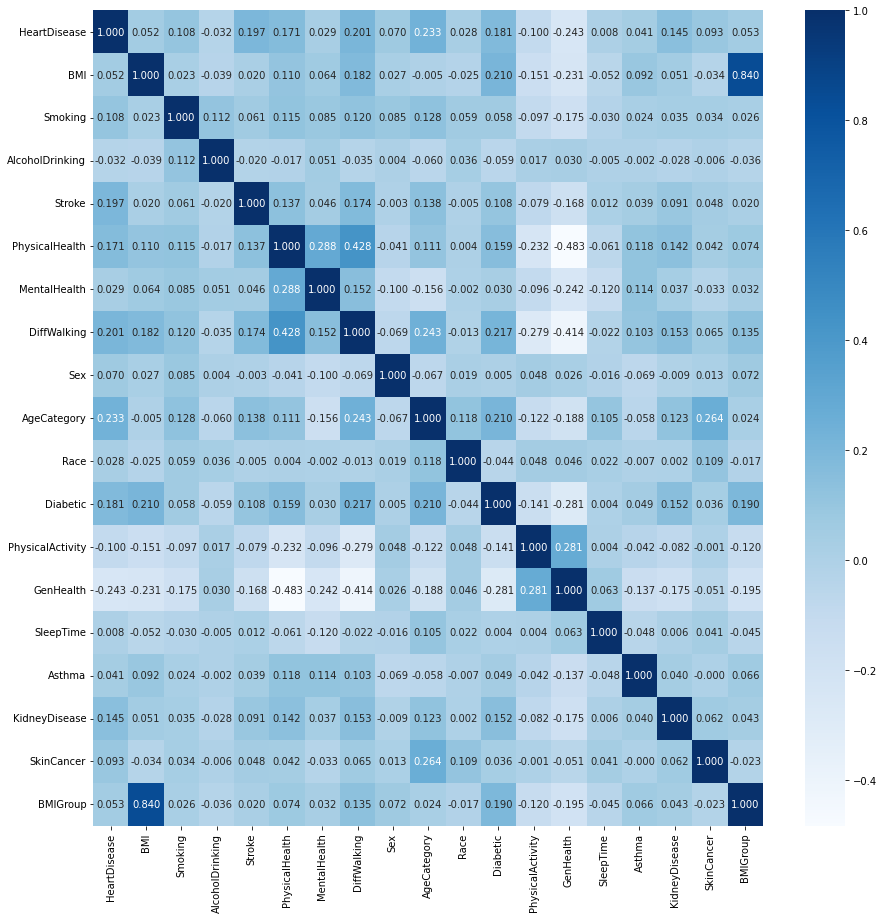

In [ ]:
plt.figure(figsize=(15,15))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3f')
plt.show()

## **Resampling & Test Train Split**

Due to the heavy imbalance between positive and negative heart disease cases in the dataset, we decided to try a few resampling methods to rebalance the class distribution. Since we are new to machine learning, we decided to each try resampling methods on our own to get practice. This resulted in having two sets of preprocessed data using oversampling methods and one using an undersampling method. After each of our resampling methods, we used the standard 80/20 training/test split based on the Pareto Principle. However, we acknowledge that splitting data after resampling may not replicate the distribution of real-world data and may cause overfitting and poor generalization to the test data.


### **Hannah and Sukriti - Random Undersampling and 80/20 Split**

This section uses undersampling to preprocess the data. Since the data has a majority of “NO” cases, undersampling is used to remove some instances of the majority case so the data set has equal cases for both instances. 

In [ ]:
# Use Random Undersampler
from imblearn.under_sampling import RandomUnderSampler

# Set the variables
X = df_encoded.drop('HeartDisease', axis = 1)
y = df_encoded['HeartDisease']

# Amount of data prior to undersampling
print("Before undersampling: ", Counter(df['HeartDisease']))

# Apply the undersampler
undersample = RandomUnderSampler(sampling_strategy= 'majority')
X_rs, y_rs = undersample.fit_resample(X, y)

# Amount of data post undersampling
print("After undersampling:",Counter(y_rs))

# New dataset that is correctly undersampled
undersampled_df = X_rs
undersampled_df.insert(0, 'HeartDisease', y_rs)

Before undersampling:  Counter({'No': 292422, 'Yes': 27373})
After undersampling: Counter({0: 27373, 1: 27373})


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

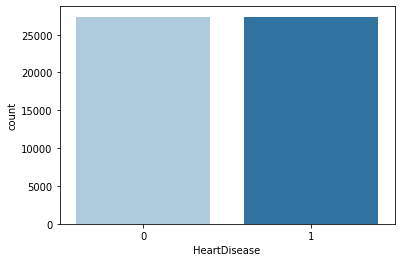

In [ ]:
sns.countplot(x=X_rs['HeartDisease'], data=X_rs)

In [ ]:
# Split-out validation dataset using train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
undersampled_training_data, undersampled_testing_data = train_test_split(undersampled_df, test_size=0.2, random_state=25)

# Show the number of items per set
print(f"No. of training examples: {undersampled_training_data.shape[0]}")
print(f"No. of testing examples: {undersampled_testing_data.shape[0]}")

No. of training examples: 43796
No. of testing examples: 10950


In [ ]:
# Split independent and dependent for undersampled data
X_undersampled_training_data = undersampled_training_data.drop('HeartDisease',axis=1)
y_undersampled_training_data = undersampled_training_data['HeartDisease']

X_undersampled_testing_data = undersampled_testing_data.drop('HeartDisease',axis=1)
y_undersampled_testing_data = undersampled_testing_data['HeartDisease']

### **Ryan - Random Oversampling and 80/20 Split**

Random oversampling is an oversampling method that randomly duplicates examples in the minority class, with replacement, and adds them to the dataset. However, this can result in overfitting for some models.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df_encoded
Y = df_encoded['HeartDisease']

# Apply Random Oversampling
randomos = RandomOverSampler(random_state = 0)
oversampledX, oversampledY = randomos.fit_resample(X,Y)
print(oversampledX.shape, oversampledY.shape)

(584844, 19) (584844,)


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

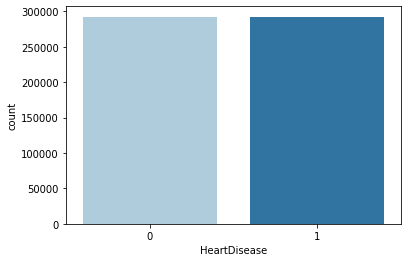

In [ ]:
sns.countplot(x=oversampledX['HeartDisease'], data=oversampledX)

In [ ]:
# Train test split
oversampled_training_data, oversampled_testing_data = train_test_split(oversampledX, test_size=0.2, random_state=25)
print(f"No. of training examples: {oversampled_training_data.shape[0]}")
print(f"No. of testing examples: {oversampled_testing_data.shape[0]}")

No. of training examples: 467875
No. of testing examples: 116969


In [ ]:
# Split independent and dependent for random oversampled
X_oversampled_training_data = oversampled_training_data.drop('HeartDisease',axis=1)
y_oversampled_training_data = oversampled_training_data['HeartDisease']

X_oversampled_testing_data = oversampled_testing_data.drop('HeartDisease',axis=1)
y_oversampled_testing_data = oversampled_testing_data['HeartDisease']

### **Sophie - SMOTE and 80/20 Split**

Although we originally wanted to try a combination of an oversampling and undersampling method (e.g. SMOTETomek or SMOTENN), we found those methods took too long for our preferences given time constraints. Therefore, we tried SMOTE (Synthetic Minority Oversampling TEchnique), another oversampling method. This method generates synthetic examples at a randomly selected point between minority class samples and any of the k minority class nearest neighbors. However, a disadvantage is that since SMOTE doesn’t take into account that neighboring examples may be from another class, this can increase the overlapping of classes and introduce additional noise.


In [ ]:
X = df_encoded.drop('HeartDisease',axis=1)
Y = df_encoded['HeartDisease']

In [ ]:
# Oversampling using SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
resample = SMOTE(k_neighbors=NearestNeighbors(n_neighbors=5, algorithm="kd_tree"),random_state = 52)
X, Y = resample.fit_resample(X, Y)
X.info()
Y.value_counts() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               584844 non-null  float64
 1   Smoking           584844 non-null  int64  
 2   AlcoholDrinking   584844 non-null  int64  
 3   Stroke            584844 non-null  int64  
 4   PhysicalHealth    584844 non-null  float64
 5   MentalHealth      584844 non-null  float64
 6   DiffWalking       584844 non-null  int64  
 7   Sex               584844 non-null  int64  
 8   AgeCategory       584844 non-null  int64  
 9   Race              584844 non-null  int64  
 10  Diabetic          584844 non-null  int64  
 11  PhysicalActivity  584844 non-null  int64  
 12  GenHealth         584844 non-null  int64  
 13  SleepTime         584844 non-null  float64
 14  Asthma            584844 non-null  int64  
 15  KidneyDisease     584844 non-null  int64  
 16  SkinCancer        58

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [ ]:
# Split dataset into 80% training, 20% testing 
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, Y, test_size=0.2, random_state=2023)
print('training data shape is :{}.'.format(X_train_SMOTE.shape))
print('training label shape is :{}.'.format(y_train_SMOTE.shape))
print('testing data shape is :{}.'.format(X_test_SMOTE.shape))
print('testing label shape is :{}.'.format(y_test_SMOTE.shape))

training data shape is :(467875, 18).
training label shape is :(467875,).
testing data shape is :(116969, 18).
testing label shape is :(116969,).


# **Modeling**

In this section, many different models were tested using the different preprocessed data sets. These resampling methods included, undersampling, oversampling, and SMOTE. 


In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
# Create pandas dataframe for model results
results = pd.DataFrame(columns=['Model','Resampling Method','Train Accuracy','Test Accuracy','Recall','Precision','F1 Score'])

In [ ]:
# Create dictionary for each of the resampling methods and their corresponding preprocessed data
resampling_methods = {"SMOTE": [X_train_SMOTE, y_train_SMOTE, X_test_SMOTE, y_test_SMOTE], 
                      "Random Oversampled": [X_oversampled_training_data, y_oversampled_training_data, X_oversampled_testing_data, y_oversampled_testing_data],
                      "Random Undersampled": [X_undersampled_training_data, y_undersampled_training_data, X_undersampled_testing_data, y_undersampled_testing_data]
                     }

In [ ]:
# This function prints a confusion matrix, visualizing the outcomes of the model and summarizing the prediction results
def plot_confusion_matrix(name, y_test, test_pred):
  cm = metrics.confusion_matrix(y_test,test_pred)
  ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

  # labels
  ax.set_title(name)
  ax.set(xlabel='Predicted labels', ylabel='True labels')
  ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
  ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

  plt.show()

In [ ]:
# This function makes predictions using the given model on all three resampling methods, 
# printing out results and adding the results to the results table
def test_model(name, model):
  # Looping through all three resampling methods
  for method in resampling_methods:
    print()

    # Train the algorithm on the training data
    model.fit(resampling_methods[method][0], resampling_methods[method][1])

    # Make predictions on both the training and testing data from the x values
    train_pred = model.predict(resampling_methods[method][0])
    test_pred = model.predict(resampling_methods[method][2])

    # Calculate the corresponding accuracy score (the fraction of correctly classified samples) for the training and testing data
    train_acc = metrics.accuracy_score(resampling_methods[method][1], train_pred)*100
    test_acc = metrics.accuracy_score(resampling_methods[method][3], test_pred)*100
    
    # Plotting confusion matrix and printing results
    plot_confusion_matrix(method, resampling_methods[method][3], test_pred)
    print(method,"Train Accuracy:",train_acc)
    print(method,"Test Accuracy:",test_acc)
    print(metrics.classification_report(resampling_methods[method][3], test_pred))

    # Recall: tp / (tp + fn); the ability of the classifier to identify all positive samples
    recall = metrics.recall_score(resampling_methods[method][3], test_pred)*100
    # Precision: tp / (tp + fp); the ability of the classifier not to label a negative sample as positive
    precision = metrics.precision_score(resampling_methods[method][3], test_pred)*100
    # F1 Score: weighted harmonic mean of the precision and recall
    f1 = metrics.f1_score(resampling_methods[method][3], test_pred)*100
    results.loc[len(results.index)] = [name, method, train_acc, test_acc, recall, precision, f1] # Adding results to results dataframe


## **Logistic Regression**

The Logistic Regression model analyzes independent variables in order to determine a binary outcome. If the calculated probability is greater than 50%, then the decision is true. All three of the resampling methods used yielded an accuracy rate of 76 - 77%. The best resampling method of the three used was SMOTE and random undersampled, yielding a rate of 77%. The model is pretty good,, and yields no potential issues relating to an overfitting of data. 


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='sag', max_iter=1000, random_state=2023)

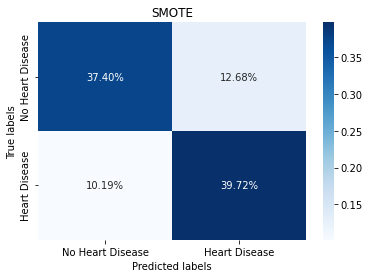

SMOTE Train Accuracy: 77.10777451242319
SMOTE Test Accuracy: 77.12812796552933
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     58584
           1       0.76      0.80      0.78     58385

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969




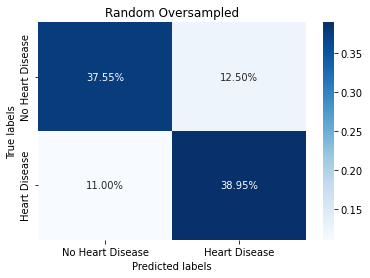

Random Oversampled Train Accuracy: 76.40822869356131
Random Oversampled Test Accuracy: 76.49719156357668
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58542
           1       0.76      0.78      0.77     58427

    accuracy                           0.76    116969
   macro avg       0.77      0.76      0.76    116969
weighted avg       0.77      0.76      0.76    116969




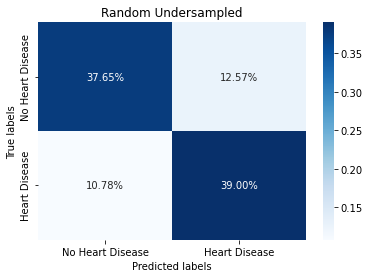

Random Undersampled Train Accuracy: 76.3882546351265
Random Undersampled Test Accuracy: 76.65753424657534
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5499
           1       0.76      0.78      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("Logistic Regression", model)

## **SGD Classifier**

SGD, or Stochastic Gradient Descent,is an optimization method and a linear classifier. Generally, gradient descent algorithms are used to minimize a cost function. The accuracy (f1 score) for all three resampling methods ranges from 60% to 78%. The SMOTE and random undersampled resampling methods yielded the highest rate of 78%. The model worked pretty well, and yields no potential issues relating to an overfitting of data. 


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier(random_state = 2023)

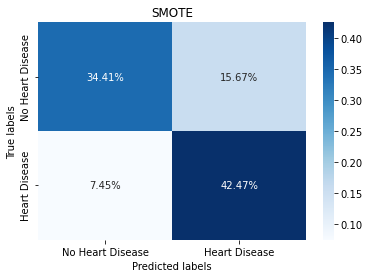

SMOTE Train Accuracy: 76.77135987176062
SMOTE Test Accuracy: 76.87934409971872
              precision    recall  f1-score   support

           0       0.82      0.69      0.75     58584
           1       0.73      0.85      0.79     58385

    accuracy                           0.77    116969
   macro avg       0.78      0.77      0.77    116969
weighted avg       0.78      0.77      0.77    116969




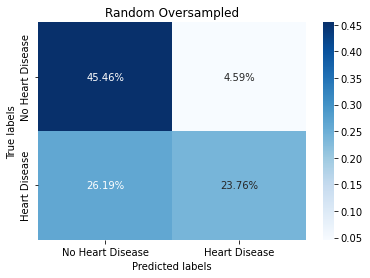

Random Oversampled Train Accuracy: 69.17510018701576
Random Oversampled Test Accuracy: 69.22004975677316
              precision    recall  f1-score   support

           0       0.63      0.91      0.75     58542
           1       0.84      0.48      0.61     58427

    accuracy                           0.69    116969
   macro avg       0.74      0.69      0.68    116969
weighted avg       0.74      0.69      0.68    116969




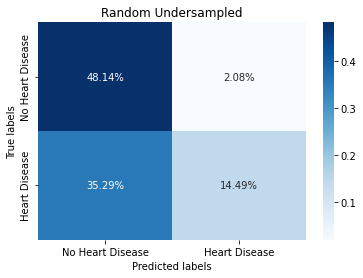

Random Undersampled Train Accuracy: 62.179194446981455
Random Undersampled Test Accuracy: 62.630136986301366
              precision    recall  f1-score   support

           0       0.58      0.96      0.72      5499
           1       0.87      0.29      0.44      5451

    accuracy                           0.63     10950
   macro avg       0.73      0.62      0.58     10950
weighted avg       0.73      0.63      0.58     10950



In [ ]:
test_model("SGD Classifier", model)

## **Ridge Classifier**

Ridge first converts the label data into [-1, 1] and then treats the problem as a regression. This model performed similarly among all three sampling methods, but performed slightly better when paired with SMOTE, having a higher recall score.  

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
model = RidgeClassifier(random_state=2023)

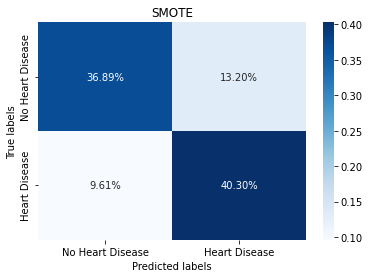

SMOTE Train Accuracy: 77.10798824472349
SMOTE Test Accuracy: 77.18711795432978
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     58584
           1       0.75      0.81      0.78     58385

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969




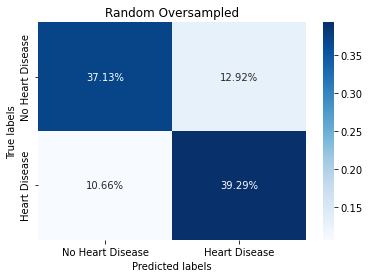

Random Oversampled Train Accuracy: 76.36056639059578
Random Oversampled Test Accuracy: 76.42281288204566
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     58542
           1       0.75      0.79      0.77     58427

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969




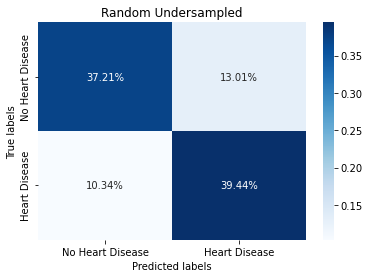

Random Undersampled Train Accuracy: 76.31290528815417
Random Undersampled Test Accuracy: 76.64840182648402
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5499
           1       0.75      0.79      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("Ridge Classifier", model)

## **Gaussian Naive Bayes**

GaussianNB, or Gaussian Naive Bayes, is used to calculate the probability of if a data point belongs in a certain category or does not. A disadvantage is that the model assumes that all features contribute equally to final outcome, however, this is not always realistic. All resampling methods worked about the same, but SMOTE was slightly better with rate of 70%. 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

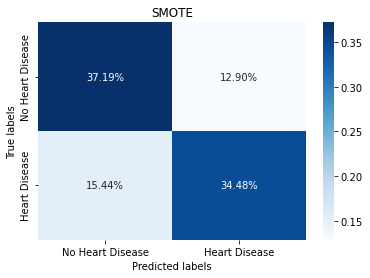

SMOTE Train Accuracy: 71.69756879508415
SMOTE Test Accuracy: 71.66514204618318
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     58584
           1       0.73      0.69      0.71     58385

    accuracy                           0.72    116969
   macro avg       0.72      0.72      0.72    116969
weighted avg       0.72      0.72      0.72    116969




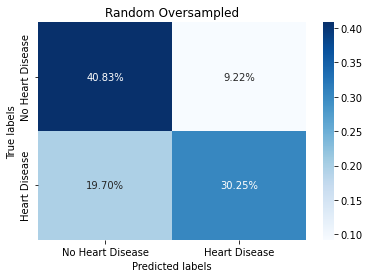

Random Oversampled Train Accuracy: 71.14271974352124
Random Oversampled Test Accuracy: 71.0855012866657
              precision    recall  f1-score   support

           0       0.67      0.82      0.74     58542
           1       0.77      0.61      0.68     58427

    accuracy                           0.71    116969
   macro avg       0.72      0.71      0.71    116969
weighted avg       0.72      0.71      0.71    116969




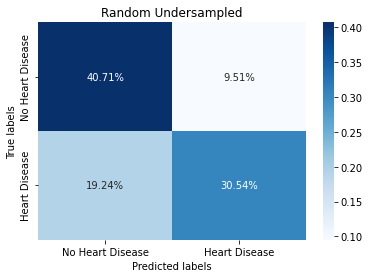

Random Undersampled Train Accuracy: 70.88546899260206
Random Undersampled Test Accuracy: 71.25114155251141
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      5499
           1       0.76      0.61      0.68      5451

    accuracy                           0.71     10950
   macro avg       0.72      0.71      0.71     10950
weighted avg       0.72      0.71      0.71     10950



In [ ]:
test_model("Gaussian Naive Bayes", model)

## **Decision Tree Classifier**

Decision Tree Classifier is an algorithm that uses a hierarchal tree like structure and uses a set of rules to make decisions. The best resampling method for this model is Random Oversampling, with an accuracy of 99% and a 95% F1 score as well. This algorithm performed slightly lower with the other resampling methods, with an accuracy of 99% and F1 score of 88% for SMOTE and an accuracy of 99% and F1 score of 66% for Random Undersampling.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

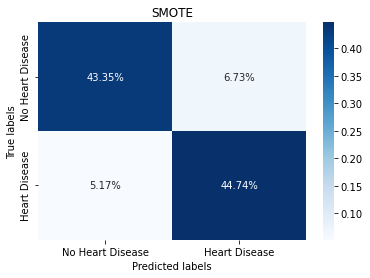

SMOTE Train Accuracy: 99.7764360138926
SMOTE Test Accuracy: 88.09513631816978
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     58584
           1       0.87      0.90      0.88     58385

    accuracy                           0.88    116969
   macro avg       0.88      0.88      0.88    116969
weighted avg       0.88      0.88      0.88    116969




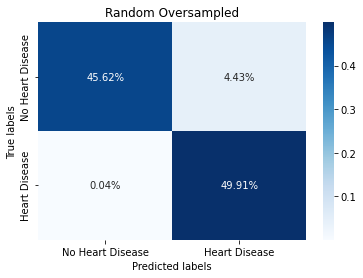

Random Oversampled Train Accuracy: 99.6612343040342
Random Oversampled Test Accuracy: 95.53129461652232
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     58542
           1       0.92      1.00      0.96     58427

    accuracy                           0.96    116969
   macro avg       0.96      0.96      0.96    116969
weighted avg       0.96      0.96      0.96    116969




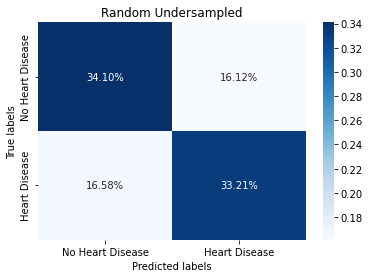

Random Undersampled Train Accuracy: 99.77395195908302
Random Undersampled Test Accuracy: 67.30593607305936
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      5499
           1       0.67      0.67      0.67      5451

    accuracy                           0.67     10950
   macro avg       0.67      0.67      0.67     10950
weighted avg       0.67      0.67      0.67     10950



In [ ]:
test_model("Decision Tree Classifier", model)

## **Random Forest Classifier**

Random Forest Classifier is an algorithm that is made up of multiple decision trees. The best resampling method for this is Random Oversampling, with accuracies of 99% and an F1 score 91%, and Random Undersampling and SMOTE having similar scores, which could display overfitting. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

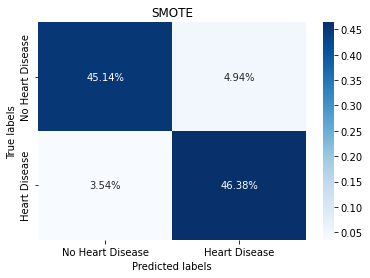

SMOTE Train Accuracy: 99.77429869088967
SMOTE Test Accuracy: 91.5225401602134
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     58584
           1       0.90      0.93      0.92     58385

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969




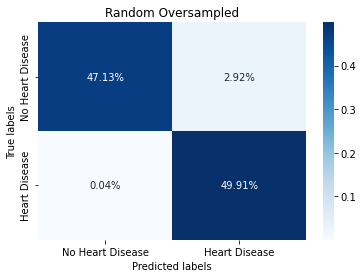

Random Oversampled Train Accuracy: 99.6610205717339
Random Oversampled Test Accuracy: 97.04366114098607
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58542
           1       0.94      1.00      0.97     58427

    accuracy                           0.97    116969
   macro avg       0.97      0.97      0.97    116969
weighted avg       0.97      0.97      0.97    116969




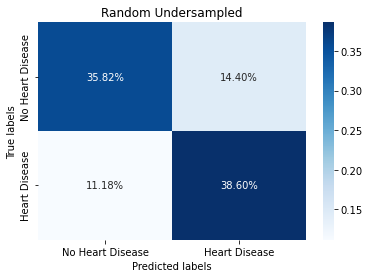

Random Undersampled Train Accuracy: 99.76938533199379
Random Undersampled Test Accuracy: 74.42009132420091
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      5499
           1       0.73      0.78      0.75      5451

    accuracy                           0.74     10950
   macro avg       0.75      0.74      0.74     10950
weighted avg       0.75      0.74      0.74     10950



In [ ]:
test_model("Random Forest Classifier", model)

## **Extra Trees Classifier**

The Extra Tree Classifier uses a meta estimator that fits a number of randomized decision trees, hence “extra” tree.  The best resampling method for this model is SMOTE, with an accuracy of 99% and an F1 score of 90%. Random oversampling performs similarly with an accuracy of 99% and an F1 score of 97%, and Random Undersampling performs lower with an accuracy of 99% and an F1 score of 74%. 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier(random_state=2023)

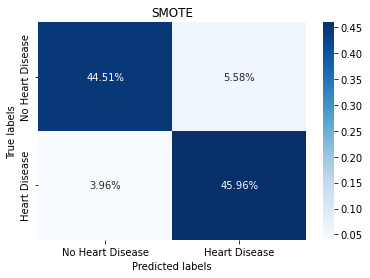

SMOTE Train Accuracy: 99.7764360138926
SMOTE Test Accuracy: 90.4667048534227
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     58584
           1       0.89      0.92      0.91     58385

    accuracy                           0.90    116969
   macro avg       0.91      0.90      0.90    116969
weighted avg       0.91      0.90      0.90    116969




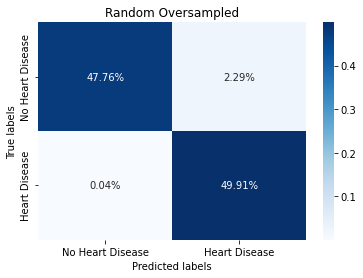

Random Oversampled Train Accuracy: 99.6612343040342
Random Oversampled Test Accuracy: 97.66946797869521
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     58542
           1       0.96      1.00      0.98     58427

    accuracy                           0.98    116969
   macro avg       0.98      0.98      0.98    116969
weighted avg       0.98      0.98      0.98    116969




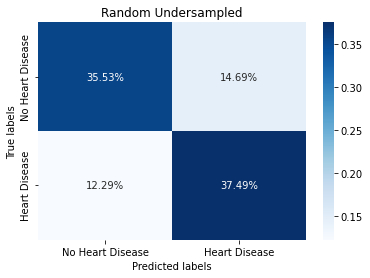

Random Undersampled Train Accuracy: 99.77395195908302
Random Undersampled Test Accuracy: 73.01369863013699
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      5499
           1       0.72      0.75      0.74      5451

    accuracy                           0.73     10950
   macro avg       0.73      0.73      0.73     10950
weighted avg       0.73      0.73      0.73     10950



In [ ]:
test_model("Extra Trees Classifier", model)

## **XGB Classifier**

XGBoost (Extreme Gradient Boosting) is a decision-tree-based ensemble algorithm that uses a gradient boosting framework. This model is very consistent between training and testing accuracy scores for all three resampling methods. XGBoost performs the best when paired with SMOTE with accuracy scores of 81% and an F1 score of 82%. With Random Oversampling and Random Undersampling, XGBoost also performs well, having accuracy scores of 76% and F1 scores of 77%.


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

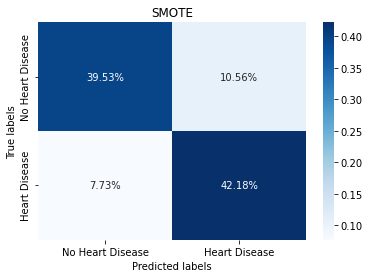

SMOTE Train Accuracy: 81.67972214800962
SMOTE Test Accuracy: 81.70711898024263
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     58584
           1       0.80      0.85      0.82     58385

    accuracy                           0.82    116969
   macro avg       0.82      0.82      0.82    116969
weighted avg       0.82      0.82      0.82    116969




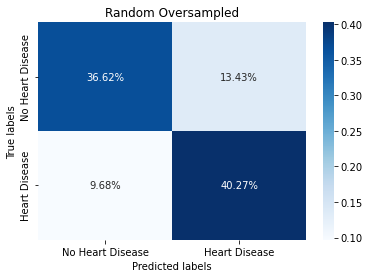

Random Oversampled Train Accuracy: 76.85407427197435
Random Oversampled Test Accuracy: 76.887038446084
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     58542
           1       0.75      0.81      0.78     58427

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969




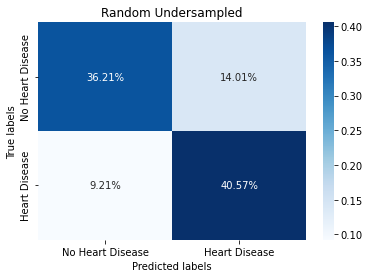

Random Undersampled Train Accuracy: 76.79240113252351
Random Undersampled Test Accuracy: 76.77625570776256
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      5499
           1       0.74      0.81      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("XGB Classifier", model)

## **Light GBM Classifier**

LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that uses tree based learning algorithms, growing tree leaf-wise unlike other algorithms. This model is very consistent between training and testing accuracy scores for all three resampling methods. LightGBM performs the best when paired with SMOTE with scores in the 80s across all categories. With Random Oversampling and Random Undersampling, LightGBM also performs well, having accuracy scores of 77% and F1 scores of 78%.


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier(max_depth=6, random_state=2023)

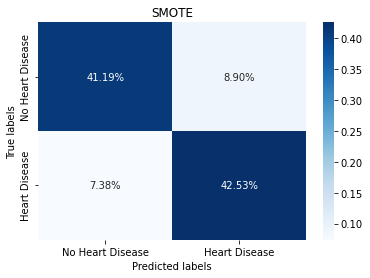

SMOTE Train Accuracy: 83.75506278386321
SMOTE Test Accuracy: 83.71876309107542
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     58584
           1       0.83      0.85      0.84     58385

    accuracy                           0.84    116969
   macro avg       0.84      0.84      0.84    116969
weighted avg       0.84      0.84      0.84    116969




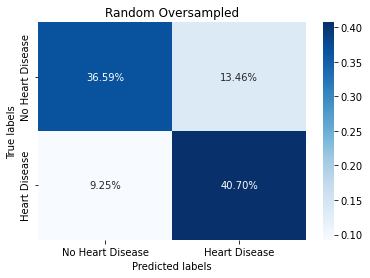

Random Oversampled Train Accuracy: 77.37878706919584
Random Oversampled Test Accuracy: 77.29227402132189
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     58542
           1       0.75      0.81      0.78     58427

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969




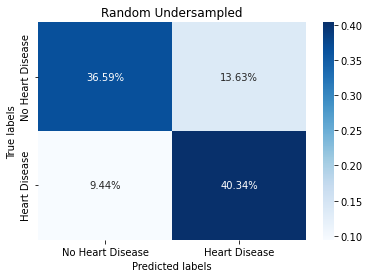

Random Undersampled Train Accuracy: 77.61439400858526
Random Undersampled Test Accuracy: 76.93150684931507
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5499
           1       0.75      0.81      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("Light GBM Classifier", model)

## **K Neighbours Classifier**

K Neighbors Classifier uses training datasets to find the k closest relatives in future examples. This model took 4 hours to run completely, so previous results have been posted below. This model performs the best across all categories when paired with Random Oversampling, with a high recall of 99% and precision of 83%. However, none of the resampling methods paired with KNN performs particularly badly as the poorest scoring with Random Undersampling have scores in the 70s.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()

In [ ]:
# This takes very long to run, so previous results are added below
# test_model("K Neighbours Classifier", model)

In [ ]:
# Add previous KNN results to results table
results.loc[len(results.index)] = ["K Neighbours Classifier", "SMOTE", 89.877211, 85.909942, 96.598441, 79.553982, 87.251603]
results.loc[len(results.index)] = ["K Neighbours Classifier", "Random Oversampled", 92.632220, 89.722063, 99.558423, 83.178185, 90.634154]
results.loc[len(results.index)] = ["K Neighbours Classifier", "Random Undersampled", 79.767559, 72.794521, 74.261603, 71.977240, 73.101580]

<div>
<img src="https://drive.google.com/uc?export=view&id=1YxH3rEOnQOm23pljP7EHhODniVB7RQJV" width="400">
</div>
<div>
<img src="https://drive.google.com/uc?export=view&id=1gigoOXJqQhD67gyWxl_i2y-0DPKU4ERc" width="400">
</div>
<div>
<img src="https://drive.google.com/uc?export=view&id=17q0G9HIRl038r5BCdNFeDwabuYWsyaN0" width="400">
</div>


## **AdaBoost Classifier**

The AdaBoost algorithm, or adaptive boosting,  is an ensemble learning method that is used to increase the efficiency of binary classifiers. The best resampling method for this model is SMOTE, with an accuracy of 79% and an F1 score of 79%. The other resampling methods had similar but lower scores, with both methods having an accuracy and F1 score of 76%, which are fairly good scores, not too low or high. 



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(random_state=2023)

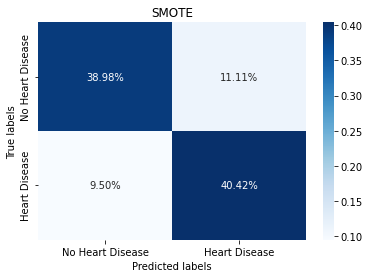

SMOTE Train Accuracy: 79.2489446967673
SMOTE Test Accuracy: 79.39539536116406
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     58584
           1       0.78      0.81      0.80     58385

    accuracy                           0.79    116969
   macro avg       0.79      0.79      0.79    116969
weighted avg       0.79      0.79      0.79    116969




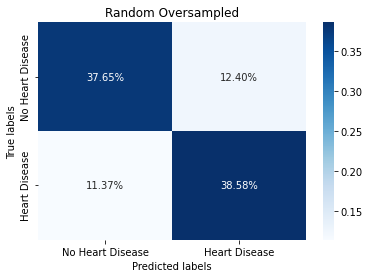

Random Oversampled Train Accuracy: 76.2408763024312
Random Oversampled Test Accuracy: 76.23729364190513
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     58542
           1       0.76      0.77      0.76     58427

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969




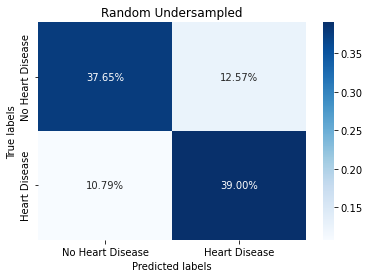

Random Undersampled Train Accuracy: 76.33573842360033
Random Undersampled Test Accuracy: 76.64840182648402
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5499
           1       0.76      0.78      0.77      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("AdaBoost Classifier", model)

## **CatBoost Classifier**

The CatBoost algorithm, or category boosting, uses gradient boosting on decision tree to create a stronger model. The best resampling method for this model is SMOTE, with an accuracy of 80% and F1 score of 81%. The other resampling methods have lower scores, having an accuracy and F1 score of about 77%, which are fairly good scores, not too low or high. 



In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [ ]:
model = CatBoostClassifier(iterations=10, learning_rate=0.5, random_seed=2023)


0:	learn: 0.5677926	total: 132ms	remaining: 1.19s
1:	learn: 0.5220067	total: 201ms	remaining: 802ms
2:	learn: 0.5004660	total: 265ms	remaining: 618ms
3:	learn: 0.4897440	total: 335ms	remaining: 502ms
4:	learn: 0.4796439	total: 406ms	remaining: 406ms
5:	learn: 0.4479841	total: 476ms	remaining: 317ms
6:	learn: 0.4367532	total: 538ms	remaining: 230ms
7:	learn: 0.4267262	total: 616ms	remaining: 154ms
8:	learn: 0.4236383	total: 680ms	remaining: 75.6ms
9:	learn: 0.4188359	total: 737ms	remaining: 0us


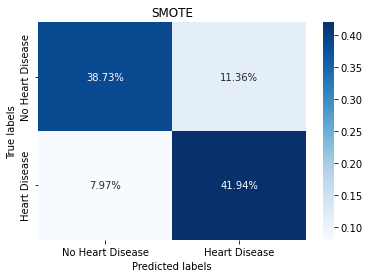

SMOTE Train Accuracy: 80.65466203580016
SMOTE Test Accuracy: 80.66838222093034
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     58584
           1       0.79      0.84      0.81     58385

    accuracy                           0.81    116969
   macro avg       0.81      0.81      0.81    116969
weighted avg       0.81      0.81      0.81    116969


0:	learn: 0.5738694	total: 86.1ms	remaining: 775ms
1:	learn: 0.5305577	total: 159ms	remaining: 636ms
2:	learn: 0.5102403	total: 229ms	remaining: 534ms
3:	learn: 0.4995994	total: 308ms	remaining: 461ms
4:	learn: 0.4943687	total: 377ms	remaining: 377ms
5:	learn: 0.4908572	total: 438ms	remaining: 292ms
6:	learn: 0.4889710	total: 512ms	remaining: 220ms
7:	learn: 0.4878678	total: 574ms	remaining: 143ms
8:	learn: 0.4868781	total: 641ms	remaining: 71.2ms
9:	learn: 0.4859768	total: 723ms	remaining: 0us


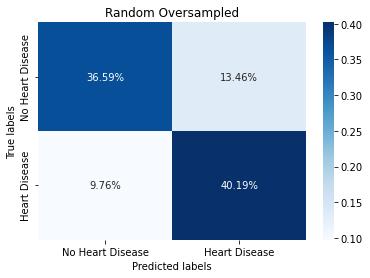

Random Oversampled Train Accuracy: 76.84488378306172
Random Oversampled Test Accuracy: 76.77504296010054
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     58542
           1       0.75      0.80      0.78     58427

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969


0:	learn: 0.5761574	total: 10.9ms	remaining: 98ms
1:	learn: 0.5340967	total: 18.5ms	remaining: 73.9ms
2:	learn: 0.5128660	total: 36.4ms	remaining: 84.9ms
3:	learn: 0.5025996	total: 44.4ms	remaining: 66.6ms
4:	learn: 0.4969787	total: 52.3ms	remaining: 52.3ms
5:	learn: 0.4929865	total: 60.4ms	remaining: 40.2ms
6:	learn: 0.4911997	total: 67.5ms	remaining: 28.9ms
7:	learn: 0.4897426	total: 75.2ms	remaining: 18.8ms
8:	learn: 0.4885172	total: 82.5ms	remaining: 9.17ms
9:	learn: 0.4876101	total: 92.9ms	remaining: 0us


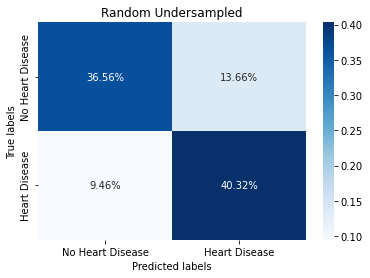

Random Undersampled Train Accuracy: 76.61201936249886
Random Undersampled Test Accuracy: 76.87671232876713
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5499
           1       0.75      0.81      0.78      5451

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [ ]:
test_model("CatBoost Classifier", model)

## **Dummy Classifier**

The Dummy model makes predictions while ignoring any input features.Predictions often depend on values found in the Y parameter. The Dummy model performed very poorly compared to the other models, with the highest f1 score of only 66%. 

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
model = DummyClassifier(random_state=2023) 

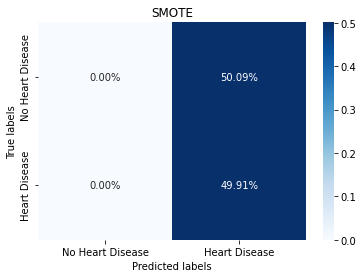

SMOTE Train Accuracy: 50.02126636387925
SMOTE Test Accuracy: 49.914934726295
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     58584
           1       0.50      1.00      0.67     58385

    accuracy                           0.50    116969
   macro avg       0.25      0.50      0.33    116969
weighted avg       0.25      0.50      0.33    116969



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



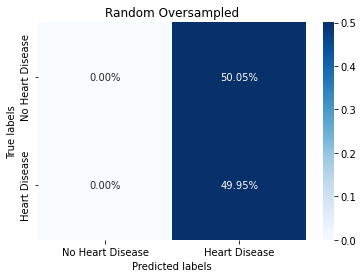

Random Oversampled Train Accuracy: 50.0122896072669
Random Oversampled Test Accuracy: 49.95084167599963
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     58542
           1       0.50      1.00      0.67     58427

    accuracy                           0.50    116969
   macro avg       0.25      0.50      0.33    116969
weighted avg       0.25      0.50      0.33    116969



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



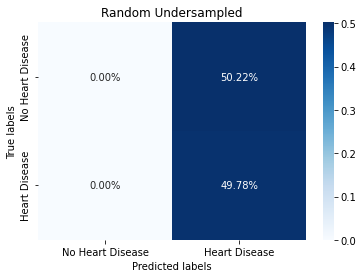

Random Undersampled Train Accuracy: 50.054799525070784
Random Undersampled Test Accuracy: 49.78082191780822
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5499
           1       0.50      1.00      0.66      5451

    accuracy                           0.50     10950
   macro avg       0.25      0.50      0.33     10950
weighted avg       0.25      0.50      0.33     10950



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
test_model("Dummy Classifier", model)

## **Results**

In [ ]:
# Results by Model 
results

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,SMOTE,77.107775,77.128128,79.582084,75.802662,77.646410
1,Logistic Regression,Random Oversampled,76.408229,76.497192,77.970801,75.704600,76.820991
2,Logistic Regression,Random Undersampled,76.388255,76.657534,78.352596,75.633080,76.968823
3,SGD Classifier,SMOTE,76.771360,76.879344,85.081785,73.041803,78.603415
4,SGD Classifier,Random Oversampled,69.175100,69.220050,47.563626,83.815901,60.688119
5,SGD Classifier,Random Undersampled,62.179194,62.630137,29.113924,87.438017,43.682907
6,Ridge Classifier,SMOTE,77.107988,77.187118,80.739916,75.328784,77.940544
7,Ridge Classifier,Random Oversampled,76.360566,76.422813,78.655416,75.259977,76.920244
8,Ridge Classifier,Random Undersampled,76.312905,76.648402,79.233168,75.191504,77.159446
9,Gaussian Naive Bayes,SMOTE,71.697569,71.665142,69.072536,72.775833,70.875842


In [ ]:
# Results by Test Accuracy
results.sort_values(["Test Accuracy"], ascending=False)

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
19,Extra Trees Classifier,Random Oversampled,99.661234,97.669468,99.912712,95.618417,97.718408
16,Random Forest Classifier,Random Oversampled,99.661021,97.043661,99.921269,94.478339,97.123607
13,Decision Tree Classifier,Random Oversampled,99.661234,95.531295,99.912712,91.855488,95.714836
15,Random Forest Classifier,SMOTE,99.774299,91.522540,92.917701,90.369976,91.626132
18,Extra Trees Classifier,SMOTE,99.776436,90.466705,92.075019,89.177532,90.603116
28,K Neighbours Classifier,Random Oversampled,92.632220,89.722063,99.558423,83.178185,90.634154
12,Decision Tree Classifier,SMOTE,99.776436,88.095136,89.639462,86.919551,88.258556
27,K Neighbours Classifier,SMOTE,89.877211,85.909942,96.598441,79.553982,87.251603
24,Light GBM Classifier,SMOTE,83.755063,83.718763,85.205104,82.700780,83.934266
21,XGB Classifier,SMOTE,81.679722,81.707119,84.506294,79.978927,82.180304


In [ ]:
# Results by F1 Score
results.sort_values(["F1 Score"], ascending=False)

,Model,Resampling Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
19,Extra Trees Classifier,Random Oversampled,99.661234,97.669468,99.912712,95.618417,97.718408
16,Random Forest Classifier,Random Oversampled,99.661021,97.043661,99.921269,94.478339,97.123607
13,Decision Tree Classifier,Random Oversampled,99.661234,95.531295,99.912712,91.855488,95.714836
15,Random Forest Classifier,SMOTE,99.774299,91.522540,92.917701,90.369976,91.626132
28,K Neighbours Classifier,Random Oversampled,92.632220,89.722063,99.558423,83.178185,90.634154
18,Extra Trees Classifier,SMOTE,99.776436,90.466705,92.075019,89.177532,90.603116
12,Decision Tree Classifier,SMOTE,99.776436,88.095136,89.639462,86.919551,88.258556
27,K Neighbours Classifier,SMOTE,89.877211,85.909942,96.598441,79.553982,87.251603
24,Light GBM Classifier,SMOTE,83.755063,83.718763,85.205104,82.700780,83.934266
21,XGB Classifier,SMOTE,81.679722,81.707119,84.506294,79.978927,82.180304
